In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '5')

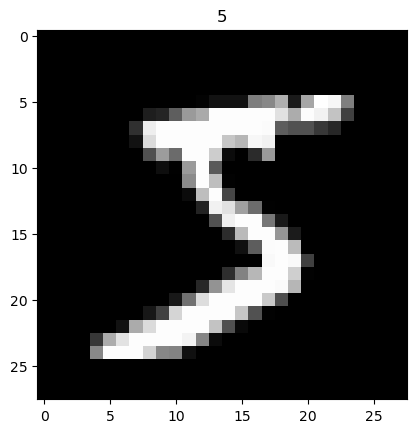

In [3]:
plt.imshow(x_train[0], cmap = 'gray')
plt.title(y_train[0])

In [4]:
# Remodelagem dos dados de treinamento (x_train) e teste (x_test)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Acessando o primeiro exemplo após a remodelagem
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
from keras.layers import BatchNormalization

In [17]:
modelo = Sequential()

modelo.add(BatchNormalization())

modelo.add(Dense(64, activation = 'relu', input_dim = x_train.shape[1]))
modelo.add(Dropout(0.2))

modelo.add(Dense(64, activation = 'relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(64, activation = 'relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(10, activation='softmax'))

In [15]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [18]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 28s 42ms/step - loss: 0.5845 - accuracy: 0.8197 - val_loss: 0.1977 - val_accuracy: 0.9430
Epoch 2/5
469/469 [==============================] - 18s 38ms/step - loss: 0.2897 - accuracy: 0.9165 - val_loss: 0.1627 - val_accuracy: 0.9510
Epoch 3/5
469/469 [==============================] - 18s 38ms/step - loss: 0.2331 - accuracy: 0.9334 - val_loss: 0.1441 - val_accuracy: 0.9587
Epoch 4/5
469/469 [==============================] - 17s 37ms/step - loss: 0.2001 - accuracy: 0.9416 - val_loss: 0.1298 - val_accuracy: 0.9624
Epoch 5/5
469/469 [==============================] - 18s 38ms/step - loss: 0.1748 - accuracy: 0.9484 - val_loss: 0.1288 - val_accuracy: 0.9651


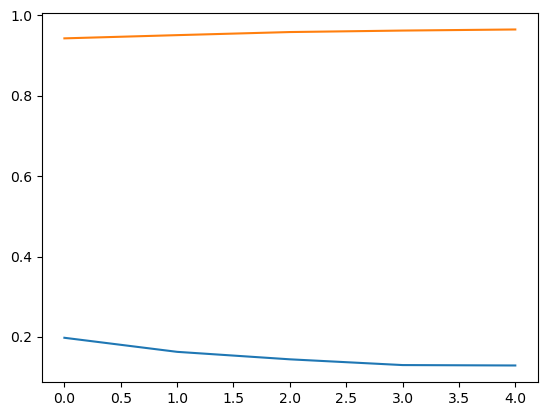

In [19]:
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_accuracy'])

In [20]:
previsoes = modelo.predict(x_test)
previsoes

313/313 [==============================] - 3s 8ms/step


array([[2.3990896e-07, 8.7190881e-07, 4.6229070e-05, ..., 9.9982589e-01,
        4.8757039e-07, 4.4705765e-05],
       [2.0100082e-09, 5.0812728e-06, 9.9995446e-01, ..., 5.6657100e-08,
        2.5433755e-07, 9.8092619e-12],
       [1.1019251e-06, 9.9933809e-01, 6.0713461e-05, ..., 1.2923370e-04,
        3.3594965e-04, 2.3082457e-05],
       ...,
       [6.4968830e-09, 8.9841787e-09, 3.4227000e-07, ..., 1.5127959e-05,
        1.8272591e-06, 1.1788304e-04],
       [1.4137853e-06, 4.0611317e-06, 5.6373224e-08, ..., 7.7552457e-08,
        1.1490201e-04, 7.0800272e-09],
       [2.8339187e-11, 1.6895969e-12, 6.9606140e-11, ..., 1.9989054e-16,
        8.8516390e-12, 1.0022886e-13]], dtype=float32)

In [21]:
# A função np.argmax() retorna o índice da classe com a maior probabilidade.

y_test_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

confusao = confusion_matrix(y_test_matrix, y_previsao_matrix)
confusao

array([[ 968,    1,    0,    1,    0,    1,    7,    1,    1,    0],
       [   0, 1120,    4,    4,    0,    0,    3,    0,    4,    0],
       [   5,    3,  997,    4,    3,    1,    3,    7,    8,    1],
       [   0,    0,   12,  979,    0,    2,    1,   10,    5,    1],
       [   2,    0,    5,    0,  954,    0,    8,    2,    1,   10],
       [   4,    0,    2,   26,    3,  840,    9,    2,    4,    2],
       [   6,    2,    1,    1,    3,    6,  938,    0,    1,    0],
       [   1,    7,   13,    1,    3,    0,    0,  994,    0,    9],
       [   3,    3,    7,    8,   11,   12,    8,    6,  912,    4],
       [   4,    6,    0,   16,   17,    6,    2,    7,    2,  949]],
      dtype=int64)

In [22]:
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
novo = x_train[20]
novo = np.expand_dims(novo, axis = 0)
pred = modelo.predict(novo)
pred = [np.argmax(t) for t in pred]
pred

1/1 [==============================] - 0s 168ms/step


[4]